# Парная линейная регрессия

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных (берём колонку '0' и используем index_col=0)
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1.0
        self.b1 = 2.0
    
    # Задание 3:
    def _to_series(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 0]
        return data
    
    def predict(self, X):
        X = self._to_series(X)
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        X = self._to_series(X)
        Y = self._to_series(Y)
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.00001, max_steps=5000):
        X = self._to_series(X)
        Y = self._to_series(Y)
        steps = []
        errors = []
        for step in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if errors:
                if new_err - errors[-1] < accuracy:
                    print(f"Ошибка увеличилась на {new_err - errors[-1]} на шаге {step + 1}")
                    break
            steps.append(step + 1)
            errors.append(new_err)
        return steps, errors

1.0
201.0
initial error: 2779.7235840959734
error after gradient descent: 2.0059226588479424e-25


1.0
201.0
initial error: 2779.7235840959734
error after gradient descent: 2.0059226588479424e-25


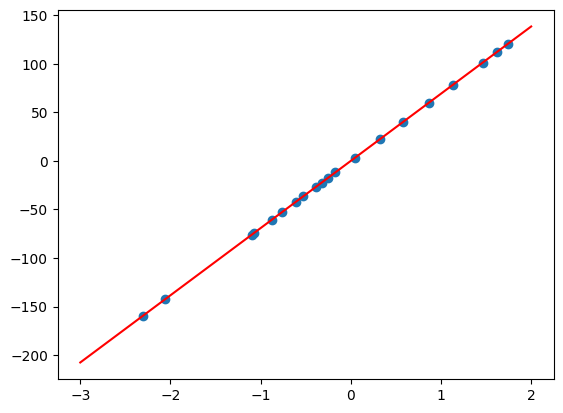

1.0
201.0
initial error: 2779.7235840959734
error after gradient descent: 2.0059226588479424e-25


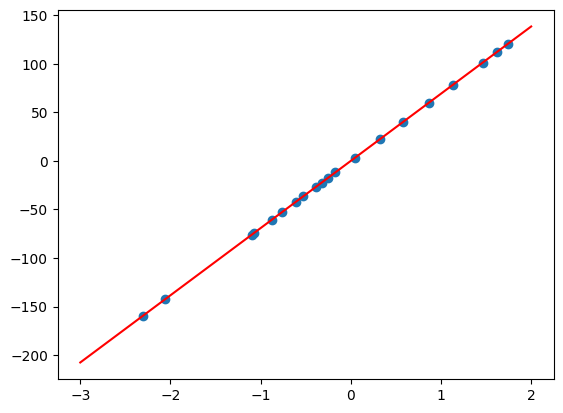

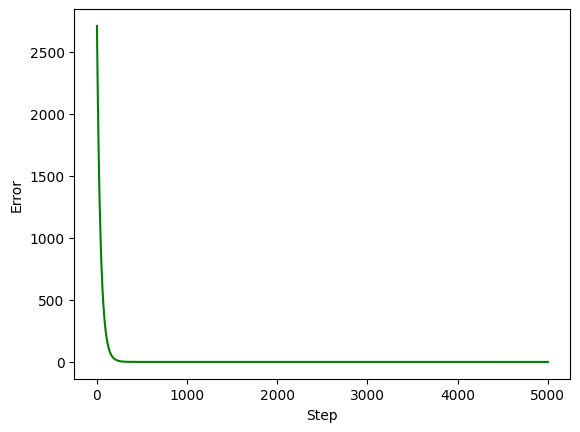

In [45]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=0.01, max_steps=5000)
print('error after gradient descent:', hyp.error(x, y))

# Линия регрессии
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# График обучения
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

#### 2. При большом alpha ~> 2, градиентный спуск расходится.

1.0
201.0
initial error: 2779.7235840959734
Ошибка увеличилась на 8954.260054861234 на шаге 2
error after gradient descent: 15275.03758211071


1.0
201.0
initial error: 2779.7235840959734
Ошибка увеличилась на 8954.260054861234 на шаге 2
error after gradient descent: 15275.03758211071


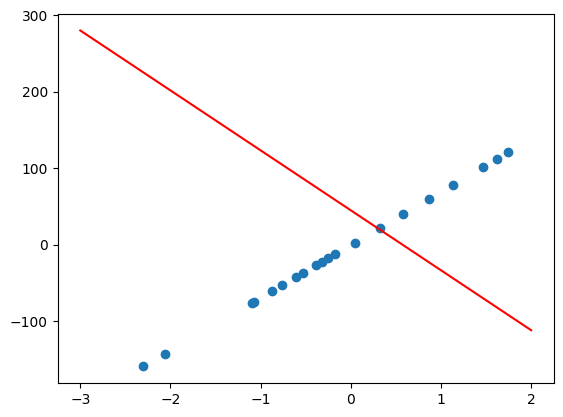

1.0
201.0
initial error: 2779.7235840959734
Ошибка увеличилась на 8954.260054861234 на шаге 2
error after gradient descent: 15275.03758211071


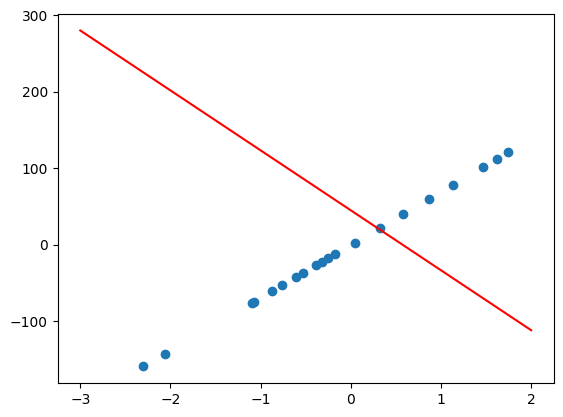

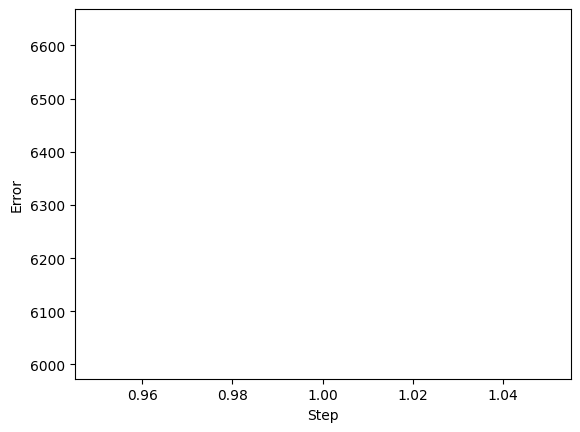

In [46]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=2.0, max_steps=5000)
print('error after gradient descent:', hyp.error(x, y))

# Линия регрессии
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# График обучения
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()